# Import ROMs

In [ ]:
import urllib.request


urllib.request.urlretrieve("http://www.atarimania.com/roms/Roms.rar", "Roms.rar")
!unrar x Roms.rar
!mkdir rars
!mv HC\ ROMS.zip ROMS.zip rars
!python -m atari_py.import_roms rars
!pip install Box2D
!pip install box2d-py


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Roms.rar

Extracting  HC ROMS.zip                                                   36%  OK 
Extracting  ROMS.zip                                                      74% 99%  OK 
All OK
copying adventure.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Adventure (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin from HC ROMS/BY ALPHABET (PAL)/A-G/Air Raid (PAL).bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/air_raid.bin
copying alien.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Alien.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/alien.bin
copying crazy_climber.bin from HC ROMS/BY ALPHABET (PAL)/A-G/REMAINING NTSC ORIGINALS/Crazy Climber.bin to /usr/local/lib/python3.7/dist-packages/atari_py/atari_roms/crazy_climber.bin
copying elevator_action.bin from HC ROMS/BY ALPHABET (PAL)/

# Install dqn

In [ ]:
!rm -rf sample_data/ .config Roms.rar rars/ agents/ replay_memory/ utils/ README.md main.py .gitignore .git model.pt videos/
!git clone https://github.com/maxencefaldor/dqn .
!git checkout master

Cloning into '.'...
remote: Enumerating objects: 355, done.
remote: Counting objects: 100% (355/355), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 355 (delta 199), reused 299 (delta 147), pack-reused 0
Receiving objects: 100% (355/355), 176.59 KiB | 11.77 MiB/s, done.
Resolving deltas: 100% (199/199), done.
Already on 'master'
Your branch is up to date with 'origin/master'.


# Import

In [ ]:
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
import gym

import matplotlib.pyplot as plt

from agents.dqn_agent import DQNAgent
from agents.ddqn_agent import DDQNAgent
from agents.rainbow_agent import RainbowAgent

from utils.network_architectures import CartpoleNetwork
from utils.network_architectures import AtariNetwork

from utils.network_architectures import DuelingCartpoleNetwork
from utils.network_architectures import DuelingAtariNetwork

from utils.network_architectures import RainbowCartpoleNetwork
from utils.network_architectures import RainbowAtariNetwork

from utils.wrappers import make_cartpole_swing_up
from utils.wrappers import make_atari

from utils.plot import ipython_show_video


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Atlantis

In [ ]:
env = make_atari("AtlantisNoFrameskip-v4", {0:0, 1:1, 2:2, 3:3})

n_episodes = 500
n_actions = 4

network_1 = AtariNetwork(n_actions=n_actions)
agent_1 = DDQNAgent(device,
                    n_actions,
                    network_1,
                    lr=0.0005,
                    gamma=0.99,
                    n=4,
                    batch_size=32,
                    n_gradient_steps=1,
                    epsilon_min=0.01,
                    epsilon_decay=5000,
                    buffer_size=1e5,
                    beta=100,
                    per=True)

network_2 = RainbowAtariNetwork(n_actions=n_actions, n_atoms=51, v_min=-10., v_max=10.)
agent_2 = RainbowAgent(device,
                       n_actions,
                       network_2,
                       lr=0.0005,
                       gamma=0.99,
                       n=4,
                       batch_size=32,
                       n_gradient_steps=1,
                       epsilon_min=0.01,
                       epsilon_decay=5000,
                       buffer_size=1e5,
                       beta=100,
                       per=True)

network_3 = AtariNetwork(n_actions=n_actions)
agent_3 = DQNAgent(device,
                   n_actions,
                   network_3,
                   lr=0.0005,
                   gamma=0.99,
                   n=1,
                   batch_size=32,
                   n_gradient_steps=1,
                   epsilon_min=0.01,
                   epsilon_decay=5000,
                   buffer_size=1e5,
                   beta=100,
                   per=False)

## Training

### Agent 1

In [ ]:
step_list_1, return_list_1 = agent_1.train(env, n_episodes)

Episode    1 :  195 steps | epsilon = 0.96 | return = 700.0
Episode    2 :  307 steps | epsilon = 0.90 | return = 1000.0
Episode    3 :  803 steps | epsilon = 0.74 | return = 8400.0
Episode    4 :  661 steps | epsilon = 0.61 | return = 7800.0
Episode    5 :  141 steps | epsilon = 0.58 | return = 400.0
Episode    6 :  141 steps | epsilon = 0.56 | return = 500.0
Episode    7 :  493 steps | epsilon = 0.46 | return = 5300.0
Episode    8 :  219 steps | epsilon = 0.41 | return = 500.0
Episode    9 :  307 steps | epsilon = 0.35 | return = 1000.0
Episode   10 :  419 steps | epsilon = 0.27 | return = 1500.0
Episode   11 :  291 steps | epsilon = 0.21 | return = 1000.0
Episode   12 :  415 steps | epsilon = 0.13 | return = 5400.0
Episode   13 :  349 steps | epsilon = 0.06 | return = 1300.0
Episode   14 :  179 steps | epsilon = 0.03 | return = 200.0
Episode   15 :  141 steps | epsilon = 0.01 | return = 0.0
Episode   16 :  141 steps | epsilon = 0.01 | return = 0.0
Episode   17 :  173 steps | epsilon

### Agent 2

In [ ]:
step_list_2, return_list_2 = agent_2.train(env, n_episodes)

Episode    1 :  141 steps | epsilon = 0.97 | return = 0.0
Episode    2 :  251 steps | epsilon = 0.92 | return = 500.0
Episode    3 :  141 steps | epsilon = 0.89 | return = 200.0


KeyboardInterrupt: ignored

### Agent 3

In [ ]:
step_list_3, return_list_3 = agent_3.train(env, n_episodes)

Episode    1 :  179 steps | epsilon = 0.96 | return = 600.0
Episode    2 :  709 steps | epsilon = 0.82 | return = 8400.0
Episode    3 :  195 steps | epsilon = 0.79 | return = 700.0
Episode    4 :  575 steps | epsilon = 0.67 | return = 7700.0
Episode    5 :  357 steps | epsilon = 0.60 | return = 1700.0
Episode    6 :  543 steps | epsilon = 0.49 | return = 5500.0
Episode    7 :  731 steps | epsilon = 0.35 | return = 7400.0
Episode    8 :  389 steps | epsilon = 0.27 | return = 1500.0
Episode    9 :  339 steps | epsilon = 0.20 | return = 1200.0
Episode   10 :  523 steps | epsilon = 0.10 | return = 5700.0
Episode   11 :  179 steps | epsilon = 0.07 | return = 700.0
Episode   12 :  179 steps | epsilon = 0.03 | return = 700.0
Episode   13 :  275 steps | epsilon = 0.01 | return = 800.0
Episode   14 :  219 steps | epsilon = 0.01 | return = 400.0
Episode   15 :  307 steps | epsilon = 0.01 | return = 1000.0
Episode   16 :  141 steps | epsilon = 0.01 | return = 400.0
Episode   17 :  237 steps | eps

## Plot

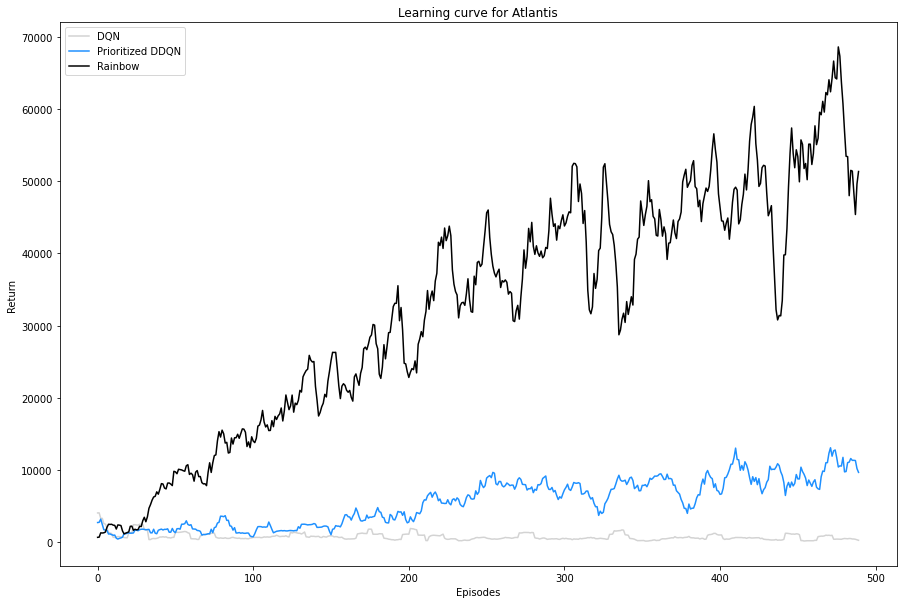

In [ ]:
def mean_window(return_list, window=10):
    return [sum(return_list[i:i+window])/window for i in range(len(return_list) - window)]

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(mean_window(return_list_1), color='dodgerblue', label="Prioritized DDQN")
ax.plot(mean_window(return_list_2), color='black', label="Rainbow")
ax.plot(mean_window(return_list_3), color='lightgray', label="DQN")

plt.legend()
plt.title("Learning curve for Atlantis")
plt.xlabel("Episodes")
plt.ylabel("Return")

plt.savefig('atlantis.png', dpi=1000)
plt.show()